# hmmlearn

    model=hmm.MultinomialHMM(n_components=3, transmat_prior=transmat, startprob_prior=startprob, params="tse")
    model.n_features=4
    model.emissionprob_=np.array([[0, 1/2, 1/2, 0], [2/3, 0, 1/3, 0], [0, 0, 1/3, 2/3]])
    model.sample()
    
> NotFittedError: This MultinomialHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this method. 

Same with any combination of `init_params` or `params`

# [pomegranate](https://pomegranate.readthedocs.io/en/latest/index.html)

In [29]:
from pomegranate import *

In [31]:
at_home_dist=DiscreteDistribution({'none': 0, 'phone': 1/2, 'home computer': 1/2, 'work station': 0})
in_transit_dist=DiscreteDistribution({'none': 2/3, 'phone': 1/3, 'home computer': 0, 'work station': 0})
at_work_dist=DiscreteDistribution({'none': 0, 'phone': 1/2, 'home computer': 0, 'work station': 1/2})

at_home_state=State(at_home_dist, name="At home")
in_transit_state=State(in_transit_dist, name="In transit")
at_work_state=State(at_work_dist, name="At work")

model=HiddenMarkovModel(name="Sequential user")
model.add_states([at_home_state, in_transit_state, at_work_state])
model.add_transition(model.start, at_home_state, 0.8)
model.add_transition(model.start, at_work_state, 0.2)
model.add_transition(at_home_state, at_home_state, 2/3)
model.add_transition(at_home_state, in_transit_state, 1/3)
model.add_transition(in_transit_state, in_transit_state, 1/3)
model.add_transition(in_transit_state, at_home_state, 1/3)
model.add_transition(in_transit_state, at_work_state, 1/3)
model.add_transition(at_work_state, at_work_state, 2/3)
model.add_transition(at_work_state, in_transit_state, 1/3)
model.bake()

model

{
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "frozen" : false,
                "class" : "Distribution",
                "parameters" : [
                    {
                        "home computer" : 0.5,
                        "work station" : 0,
                        "phone" : 0.5,
                        "none" : 0
                    }
                ],
                "name" : "DiscreteDistribution"
            },
            "name" : "At home",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "frozen" : false,
                "class" : "Distribution",
                "parameters" : [
                    {
                        "home computer" : 0,
                        "work station" : 0.5,
                        "phone" : 0.5,
                        "none" : 0
                    }
                ],
                "name" : "Disc

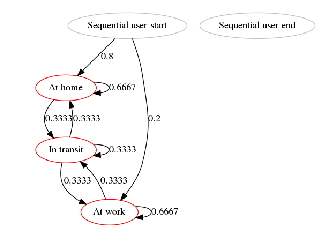

In [32]:
%matplotlib inline
model.plot()

In [38]:
model.sample(length=20, path=True)

[['home computer',
  'phone',
  'none',
  'home computer',
  'home computer',
  'home computer',
  'none',
  'phone',
  'work station',
  'phone',
  'phone',
  'work station',
  'phone',
  'none',
  'work station',
  'work station',
  'phone',
  'work station',
  'work station',
  'work station'],
 [{
      "class" : "State",
      "distribution" : null,
      "name" : "Sequential user-start",
      "weight" : 1.0
  }, {
      "class" : "State",
      "distribution" : {
          "frozen" : false,
          "class" : "Distribution",
          "parameters" : [
              {
                  "home computer" : 0.5,
                  "work station" : 0,
                  "none" : 0,
                  "phone" : 0.5
              }
          ],
          "name" : "DiscreteDistribution"
      },
      "name" : "At home",
      "weight" : 1.0
  }, {
      "class" : "State",
      "distribution" : {
          "frozen" : false,
          "class" : "Distribution",
          "parameters" : [
  